# 0. import

In [12]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import sys
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_random_seed(seed)

# 셀 너비 비율 조정하는 코드
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

# 1. 데이터 확인

In [54]:
# 데이터 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [55]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [56]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [57]:
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


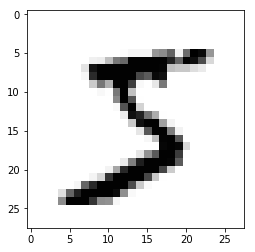

In [58]:
# 그래프로 확인 : 28픽셀 x 28픽셀 = 784픽셀
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [59]:
Y_class_train[0]

5

In [60]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


## ★-> 784개의 속성(28x28)을 이용해 10개 클래스(0~9)를 맞추는 문제가 되었다

# 2. 데이터 전처리

## 차원 변환: X값 (28,28) 2차원 배열을 (28,28,1) 3차원으로 변환 : .reshape() 함수

### X_train 차원 변환(2->3), 정규화

In [61]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float64') / 255

In [62]:
X_train.shape

(60000, 28, 28)

In [63]:
# 2차원 -> 3차원으로 변환
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_train.shape

(60000, 28, 28, 1)

In [64]:
# 정규화를 위해 실수형으로 변환
X_train = X_train.astype('float64')
X_train.shape

(60000, 28, 28, 1)

In [65]:
# 정규화(normalization)
X_train = X_train / 255
X_train.shape

(60000, 28, 28, 1)

### X_test 차원 변환(2->3), 정규화

In [66]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float64') / 255
X_test.shape

(10000, 28, 28, 1)

## Y 레이블 값들을 원-핫 인코딩

In [67]:
# np_utils.to_categorical(클래스, 클래스의 갯수)
Y_train = np_utils.to_categorical(Y_class_train, 10)

In [68]:
print(Y_class_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [69]:
print(Y_class_train[1])
print(Y_train[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
# np_utils.to_categorical(클래스, 클래스의 갯수)
Y_test = np_utils.to_categorical(Y_class_test, 10)
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## -> 데이터 전처리 끝. 이제 딥러닝을 실행할 차례¶

# 3. 딥러닝 구조 만들기

In [ ]:
# CNN 기본 뼈대
"""
model = Sequential()
model.add(Conv2D())   # 입력층+CV층
model.add(Conv2D())   # CV층

model.add(MaxPooling2D())   # 꼭 필요한 것만 선택
model.add(Dropout())        # 과적합 방지
model.add(Flatten())        # 1차원으로 변환

model.add(Dense())    # 은닉층 1개-128노드
model.add(Dropout())
model.add(Dense())    # 출력층 1개-10노드
"""

In [ ]:
# CNN 구조 스케치
"""
컨볼루션 층 2개
덴스 층 2개

# Conv2D층 2개
- Conv2D층 마스크 갯수 : 32개, 64개
- 마스크 사이즈 : kernal_size = (3, 3),
- 입력값 : input_shape=(28, 28, 1),
- 활성화함수 : 'relu'

# MaxPooling, Dropout, Flatten
- MaxPooling2D(pool_size=2)  # 특정 구역 내 가장 큰 값만 남기고 나머지는 제거. 창크기=2
- Dropout(0.25)              
- Flatten()

# Dense층 2개
- 은닉층 1개, 노드 = 128개
- Dropout(0.5)
- 출력층 1개, 노드 = 10개
- activation : 은닉층:'relu', 출력층: 'softmax'

# compile
- loss : categorical_crossentropy
- optimizer : 'adam'

# 모델 최적화 설정

# 학습
- epochs=30, 
- batch_size=200, 
- verbose=0, 
- callbacks=[early_stopping_callback, checkpointer])
"""

In [71]:
# 층마다 학습환경 세팅하기
model = Sequential()
# Convolution(합성곱) 층 2개
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# 맥스풀링, 드랍아웃, 플래튼
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())

# Dense층
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 4. 모델 컴파일

In [72]:
# 모델 compile
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 5. 모델 최적화 설정

In [73]:
pwd

'C:\\Users\\runia\\Desktop\\CNN_MNIST_케라스'

In [74]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 6. 학습 및 결과 출력

In [75]:
# 모델의 실행 - 7분 걸림
%time history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),\
                          epochs=30, batch_size=200, verbose=0,\
                          callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05647, saving model to ./model/01-0.0565.hdf5

Epoch 00002: val_loss improved from 0.05647 to 0.03935, saving model to ./model/02-0.0394.hdf5

Epoch 00003: val_loss improved from 0.03935 to 0.03365, saving model to ./model/03-0.0336.hdf5

Epoch 00004: val_loss improved from 0.03365 to 0.03007, saving model to ./model/04-0.0301.hdf5

Epoch 00005: val_loss did not improve from 0.03007

Epoch 00006: val_loss improved from 0.03007 to 0.02987, saving model to ./model/06-0.0299.hdf5

Epoch 00007: val_loss did not improve from 0.02987

Epoch 00008: val_loss improved from 0.02987 to 0.02976, saving model to ./model/08-0.0298.hdf5

Epoch 00009: val_loss improved from 0.02976 to 0.02653, saving model to ./model/09-0.0265.hdf5

Epoch 00010: val_loss did not improve from 0.02653

Epoch 00011: val_loss did not improve from 0.02653

Epoch 00012: val_loss did not improve from 0.02653
Wall time: 14min 56s


10000/10000 [==============================] - 3s 309us/step

 Test Accuracy: 0.9925


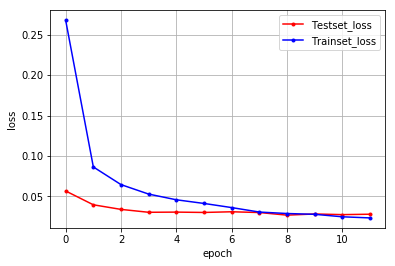

In [76]:
# 결과 출력
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 7. 모델 평가

- 테스트 정확도는 0.9925(NOT CNN 모델-0.9821보다 정확도 상승)
- 100%가 되지 못한 이유는 데이터 안에 식별 불가한 글씨가 들어있었기 때문